渋谷のモバ空滞在データを処理

In [18]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 

<class 'numpy.int64'> 362257284
08 533935952 [9874]
<class 'numpy.int64'> 362257284
08 533935854 [8323]
<class 'numpy.int64'> 362257284
08 533935863 [11090]
<class 'numpy.int64'> 362257284
08 533935961 [14080]
<class 'numpy.int64'> 362257284
10 533935952 [19210]
<class 'numpy.int64'> 362257284
10 533935854 [20955]
<class 'numpy.int64'> 362257284
10 533935863 [22285]
<class 'numpy.int64'> 362257284
10 533935961 [24668]
<class 'numpy.int64'> 362257283
12 533935952 [27144]
<class 'numpy.int64'> 362257283
12 533935854 [23967]
<class 'numpy.int64'> 362257283
12 533935863 [25342]
<class 'numpy.int64'> 362257283
12 533935961 [30103]
<class 'numpy.int64'> 362257263
14 533935952 [32150]
<class 'numpy.int64'> 362257263
14 533935854 [24896]
<class 'numpy.int64'> 362257263
14 533935863 [26116]
<class 'numpy.int64'> 362257263
14 533935961 [32206]
<class 'numpy.int64'> 362257263
16 533935952 [33215]
<class 'numpy.int64'> 362257263
16 533935854 [24498]
<class 'numpy.int64'> 362257263
16 533935863 [26

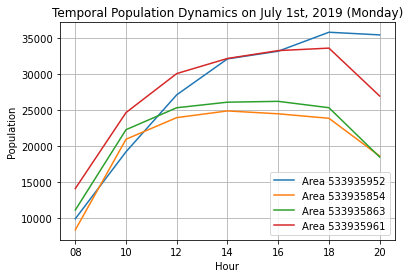

In [19]:
hour_lists = ['08', '10', '12', '14', '16', '18', '20']
area_lists = ['533935952', '533935854', '533935863', '533935961']
pop_dict = {area: [] for area in area_lists}

for hour in hour_lists:
    df_mobaku = pd.read_csv(f'/Users/takahiromatsunaga/res2023/mobaku/clipped_mesh_pop_20190701{hour}00_00000.csv')
    for area in area_lists:
        print(type(df_mobaku.loc[0, 'area']), df_mobaku.loc[0, 'area'])
        pop_at_hour = df_mobaku[df_mobaku['area'] == int(area)]['population'].values
        print(hour, area, pop_at_hour)
        pop_dict[area].append(pop_at_hour[0])  if len(pop_at_hour) > 0 else 0

# 確認
for area in area_lists:
    print(f"{area}: {pop_dict[area]}")

# 各エリアごとに折れ線グラフを描画
for area in area_lists:
    plt.plot(hour_lists, pop_dict[area], label=f'Area {area}')

plt.xlabel('Hour')
plt.ylabel('Population')
plt.title('Temporal Population Dynamics on July 1st, 2019 (Monday)')
plt.legend()
plt.grid(True)
plt.show()

533935952: [9874, 19210, 27144, 32150, 33215, 35858, 35490]
533935854: [8323, 20955, 23967, 24896, 24498, 23871, 18614]
533935863: [11090, 22285, 25342, 26116, 26232, 25346, 18476]
533935961: [14080, 24668, 30103, 32206, 33299, 33647, 26975]


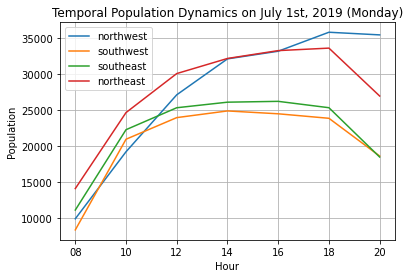

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

hour_lists = ['08', '10', '12', '14', '16', '18', '20']
area_lists = ['533935952', '533935854', '533935863', '533935961']
labels = ['northwest', 'southwest', 'southeast', 'northeast']  # 新しいラベル
pop_dict = {area: [] for area in area_lists}

for hour in hour_lists:
    df_mobaku = pd.read_csv(f'/Users/takahiromatsunaga/res2023/mobaku/clipped_mesh_pop_20190701{hour}00_00000.csv')
    for area in area_lists:
        pop_at_hour = df_mobaku[df_mobaku['area'] == int(area)]['population'].values
        pop_dict[area].append(pop_at_hour[0]) if len(pop_at_hour) > 0 else 0

# 確認
for area in area_lists:
    print(f"{area}: {pop_dict[area]}")

# 各エリアごとに折れ線グラフを描画
for area, label in zip(area_lists, labels):
    plt.plot(hour_lists, pop_dict[area], label=f'{label}')

plt.xlabel('Hour')
plt.ylabel('Population')
plt.title('Temporal Population Dynamics on July 1st, 2019 (Monday)')
plt.legend()
plt.grid(True)
plt.show()


533935952: [9874, 19210, 27144, 32150, 33215, 35858, 35490]
533935854: [8323, 20955, 23967, 24896, 24498, 23871, 18614]
533935863: [11090, 22285, 25342, 26116, 26232, 25346, 18476]
533935961: [14080, 24668, 30103, 32206, 33299, 33647, 26975]


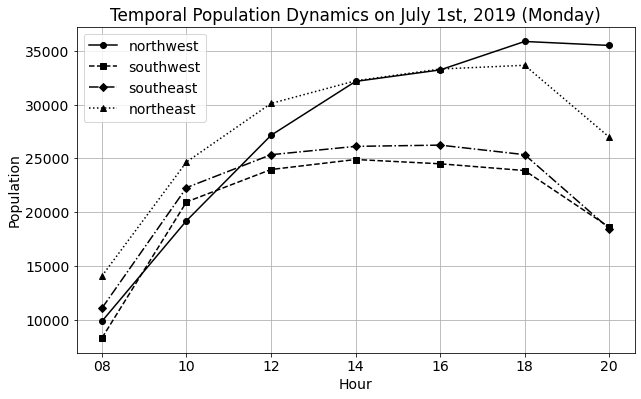

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

hour_lists = ['08', '10', '12', '14', '16', '18', '20']
area_lists = ['533935952', '533935854', '533935863', '533935961']
labels = ['northwest', 'southwest', 'southeast', 'northeast']  # 新しいラベル
pop_dict = {area: [] for area in area_lists}

plt.rcParams.update({'font.size': 14})  # すべてのテキストのフォントサイズを14に設定

# 各時間における人口データを読み込む
for hour in hour_lists:
    df_mobaku = pd.read_csv(f'/Users/takahiromatsunaga/res2023/mobaku/clipped_mesh_pop_20190701{hour}00_00000.csv')
    for area in area_lists:
        pop_at_hour = df_mobaku[df_mobaku['area'] == int(area)]['population'].values
        pop_dict[area].append(pop_at_hour[0]) if len(pop_at_hour) > 0 else 0

# 確認
for area in area_lists:
    print(f"{area}: {pop_dict[area]}")

# モノクロのスタイルで区別するためのマーカーとラインスタイルの設定
markers = ['o', 's', 'D', '^']
linestyles = ['-', '--', '-.', ':']

# 各エリアごとに折れ線グラフを描画
plt.figure(figsize=(10, 6))
for area, label, marker, linestyle in zip(area_lists, labels, markers, linestyles):
    plt.plot(hour_lists, pop_dict[area], label=label, marker=marker, linestyle=linestyle, color='black')

plt.xlabel('Hour')
plt.ylabel('Population')
plt.title('Temporal Population Dynamics on July 1st, 2019 (Monday)')
plt.legend()
plt.grid(True)
plt.show()


533935961
43367
87118
106556
115368
117244
118722
99555
[43367, 87118, 106556, 115368, 117244, 118722, 99555]


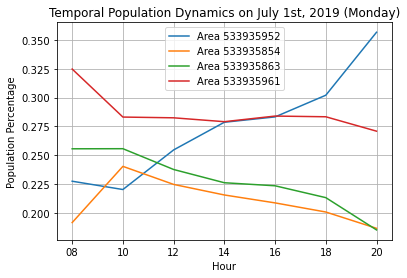

In [28]:
# 各時間における全地域の合計人口を計算
total_pops = []
print(area)
for i in range(len(hour_lists)):
    total_pop = sum(pop_dict[area][i] for area in area_lists)
    print(total_pop)
    total_pops.append(total_pop)

print(total_pops)

# 各地域ごとの割合を格納する辞書の初期化
pop_percentage_dict = {area: [] for area in area_lists}

# 各地域ごとの割合を計算
for area in area_lists:
    for i in range(len(hour_lists)):
        if total_pops[i] > 0:
            percentage = pop_dict[area][i] / total_pops[i]
        else:
            percentage = 0
        pop_percentage_dict[area].append(percentage)

# 各エリアごとに割合を折れ線グラフで描画
for area in area_lists:
    plt.plot(hour_lists, pop_percentage_dict[area], label=f'Area {area}')

plt.xlabel('Hour')
plt.ylabel('Population Percentage')
plt.title('Temporal Population Dynamics on July 1st, 2019 (Monday)')
plt.legend()
plt.grid(True)
plt.show()


<class 'numpy.int64'> 362257284
08 533935952 [9874]
<class 'numpy.int64'> 362257284
08 533935854 [8323]
<class 'numpy.int64'> 362257284
08 533935863 [11090]
<class 'numpy.int64'> 362257284
08 533935961 [14080]
<class 'numpy.int64'> 362257284
10 533935952 [19210]
<class 'numpy.int64'> 362257284
10 533935854 [20955]
<class 'numpy.int64'> 362257284
10 533935863 [22285]
<class 'numpy.int64'> 362257284
10 533935961 [24668]
<class 'numpy.int64'> 362257283
12 533935952 [27144]
<class 'numpy.int64'> 362257283
12 533935854 [23967]
<class 'numpy.int64'> 362257283
12 533935863 [25342]
<class 'numpy.int64'> 362257283
12 533935961 [30103]
<class 'numpy.int64'> 362257263
14 533935952 [32150]
<class 'numpy.int64'> 362257263
14 533935854 [24896]
<class 'numpy.int64'> 362257263
14 533935863 [26116]
<class 'numpy.int64'> 362257263
14 533935961 [32206]
<class 'numpy.int64'> 362257263
16 533935952 [33215]
<class 'numpy.int64'> 362257263
16 533935854 [24498]
<class 'numpy.int64'> 362257263
16 533935863 [26

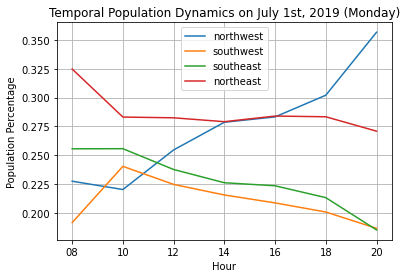

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

hour_lists = ['08', '10', '12', '14', '16', '18', '20']
area_lists = ['533935952', '533935854', '533935863', '533935961']
labels = ['northwest', 'southwest', 'southeast', 'northeast']  # 新しいラベル
pop_dict = {area: [] for area in area_lists}

for hour in hour_lists:
    df_mobaku = pd.read_csv(f'/Users/takahiromatsunaga/res2023/mobaku/clipped_mesh_pop_20190701{hour}00_00000.csv')
    for area in area_lists:
        print(type(df_mobaku.loc[0, 'area']), df_mobaku.loc[0, 'area'])
        pop_at_hour = df_mobaku[df_mobaku['area'] == int(area)]['population'].values
        print(hour, area, pop_at_hour)
        pop_dict[area].append(pop_at_hour[0])  if len(pop_at_hour) > 0 else 0

# 各時間における全地域の合計人口を計算
total_pops = []
for i in range(len(hour_lists)):
    print(len(hour_lists))
    print(len(pop_dict[area]))
    total_pop = sum(pop_dict[area][i] for area in area_lists)
    total_pops.append(total_pop)

print(total_pops)

# 各地域ごとの割合を格納する辞書の初期化
pop_percentage_dict = {area: [] for area in area_lists}

# 各地域ごとの割合を計算
for area in area_lists:
    for i in range(len(hour_lists)):
        if total_pops[i] > 0:
            percentage = pop_dict[area][i] / total_pops[i]
        else:
            percentage = 0
        pop_percentage_dict[area].append(percentage)

# 各エリアごとに割合を折れ線グラフで描画
for area, label in zip(area_lists, labels):
    plt.plot(hour_lists, pop_percentage_dict[area], label=label)

plt.xlabel('Hour')
plt.ylabel('Population Percentage')
plt.title('Temporal Population Dynamics on July 1st, 2019 (Monday)')
plt.legend()
plt.grid(True)
plt.show()


[43367, 87118, 106556, 115368, 117244, 118722, 99555]


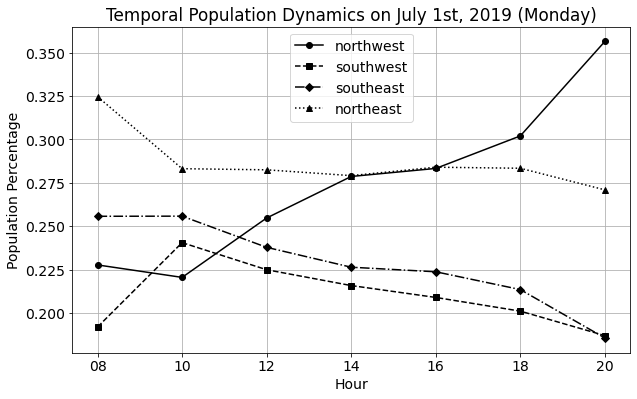

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# フォントサイズを設定
plt.rcParams.update({'font.size': 14})  # すべてのテキストのフォントサイズを14に設定

hour_lists = ['08', '10', '12', '14', '16', '18', '20']
area_lists = ['533935952', '533935854', '533935863', '533935961']
labels = ['northwest', 'southwest', 'southeast', 'northeast']  # 新しいラベル
pop_dict = {area: [] for area in area_lists}

# 各時間における人口データを読み込む
for hour in hour_lists:
    df_mobaku = pd.read_csv(f'/Users/takahiromatsunaga/res2023/mobaku/clipped_mesh_pop_20190701{hour}00_00000.csv')
    for area in area_lists:
        pop_at_hour = df_mobaku[df_mobaku['area'] == int(area)]['population'].values
        pop_dict[area].append(pop_at_hour[0]) if len(pop_at_hour) > 0 else 0

# 各時間における全地域の合計人口を計算
total_pops = []
for i in range(len(hour_lists)):
    total_pop = sum(pop_dict[area][i] for area in area_lists)
    total_pops.append(total_pop)

print(total_pops)

# 各地域ごとの割合を格納する辞書の初期化
pop_percentage_dict = {area: [] for area in area_lists}

# 各地域ごとの割合を計算
for area in area_lists:
    for i in range(len(hour_lists)):
        if total_pops[i] > 0:
            percentage = pop_dict[area][i] / total_pops[i]
        else:
            percentage = 0
        pop_percentage_dict[area].append(percentage)

# モノクロのスタイルで区別するためのマーカーとラインスタイルの設定
markers = ['o', 's', 'D', '^']
linestyles = ['-', '--', '-.', ':']

# 各エリアごとに割合を折れ線グラフで描画
plt.figure(figsize=(10, 6))
for area, label, marker, linestyle in zip(area_lists, labels, markers, linestyles):
    plt.plot(hour_lists, pop_percentage_dict[area], label=label, marker=marker, linestyle=linestyle, color='black')

plt.xlabel('Hour')
plt.ylabel('Population Percentage')
plt.title('Temporal Population Dynamics on July 1st, 2019 (Monday)')
plt.legend()
plt.grid(True)
plt.show()


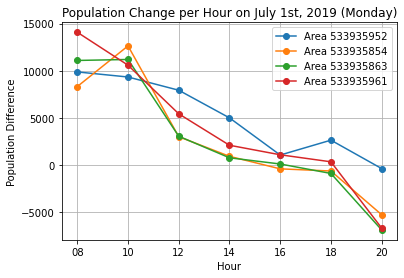

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

hour_lists = ['08', '10', '12', '14', '16', '18', '20']
area_lists = ['533935952', '533935854', '533935863', '533935961']
pop_dict = {area: [] for area in area_lists}
diff_dict = {area: [] for area in area_lists}  # 差分を保存する辞書

for hour in hour_lists:
    df_mobaku = pd.read_csv(f'/Users/takahiromatsunaga/res2023/mobaku/clipped_mesh_pop_20190701{hour}00_00000.csv')
    for area in area_lists:
        pop_at_hour = df_mobaku[df_mobaku['area'] == int(area)]['population'].values
        pop_dict[area].append(pop_at_hour[0]) if len(pop_at_hour) > 0 else 0

# 差分を計算
for area in area_lists:
    previous_population = 0  # 最初の時刻は前時刻の人口を0とする
    for population in pop_dict[area]:
        diff_dict[area].append(population - previous_population)
        previous_population = population

# 差分をプロット
for area in area_lists:
    plt.plot(hour_lists, diff_dict[area], marker='o', label=f'Area {area}')

plt.xlabel('Hour')
plt.ylabel('Population Difference')
plt.title('Population Change per Hour on July 1st, 2019 (Monday)')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

hour_lists = ['08', '10', '12', '14', '16', '18', '20']
area_lists = ['533935952', '533935854', '533935863', '533935961']
labels = ['northwest', 'southwest', 'southeast', 'northeast']  # 新しいラベル
pop_dict = {area: [] for area in area_lists}

# 各時間における全地域の合計人口を計算
total_pops = []
for i in range(len(hour_lists)):
    print(len(hour_lists))
    print(len(pop_dict[area]))
    total_pop = sum(pop_dict[area][i] for area in area_lists)
    total_pops.append(total_pop)

print(total_pops)

# 各地域ごとの割合を格納する辞書の初期化
pop_percentage_dict = {area: [] for area in area_lists}

# 各地域ごとの割合を計算
for area in area_lists:
    for i in range(len(hour_lists)):
        if total_pops[i] > 0:
            percentage = pop_dict[area][i] / total_pops[i]
        else:
            percentage = 0
        pop_percentage_dict[area].append(percentage)

# 各エリアごとに割合を折れ線グラフで描画
for area, label in zip(area_lists, labels):
    plt.plot(hour_lists, pop_percentage_dict[area], label=label)

plt.xlabel('Hour')
plt.ylabel('Population Percentage')
plt.title('Temporal Population Dynamics on July 1st, 2019 (Monday)')
plt.legend()
plt.grid(True)
plt.show()


7
0


IndexError: list index out of range